In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
df = pd.read_csv('files/hits.csv')
df.head(3)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.groupby("Genre").size()

In [ ]:
data = df.loc[:, ["Genre", "Popularity", "Year"]]
data.fillna(0, inplace=True)
data

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x="Year", y="Popularity", hue="Genre")
plt.legend(loc="center", bbox_to_anchor=(1.2, 0.5))
plt.show()

In [10]:
pop = data[data["Genre"] == "Pop"]

In [11]:
pv = pop.pivot_table(index="Year", columns="Genre", values="Popularity")

In [ ]:
pv.sort_values(by="Year", ascending=True, axis=0)

In [13]:
x = pv.index
y = np.array(pv["Pop"])

xtrain, xtest = x[:int(len(x) * 0.8)], x[int(len(x) * 0.8):]
ytrain, ytest = y[:int(len(y) * 0.8)], y[int(len(y) * 0.8):]

In [ ]:
plt.scatter(xtrain, ytrain, color="blue")
plt.show()

In [ ]:
ytrain

In [37]:
m = 1
b = 1
lr = 0
ud = 0
wi = 1
he = 1
mx = 1
my = 1
valid_err = 19.45
err = err_ant = 1000

best = [m, b, lr, ud, wi, he, mx, my]

def mf(x):
    x = (x + lr) * wi * mx
    # r = m*x + b
    res = m*(x**3)
    res = (res + ud) * he * my
    return res

def error(y_hat):
    return np.sum((ytrain - y_hat)**2) / len(y)

n = 10

i = 0
# for i in range(n):
while err > valid_err:
    i += 1
    y_hat = mf(xtrain)
    err = error(y_hat)

    if err < err_ant:
        print(f"b: {round(b, 2)} m: {round(m, 2)} lr: {round(lr, 2)} ud: {round(ud, 2)} wi: {round(wi, 2)} he: {round(he, 2)} mx: {round(mx, 2)} my: {round(my, 2)} error: {round(err, 2)}")
        best = [m, b, lr, ud, wi, he, mx, my]
    else:
        m = best[0] + random.uniform(-0.1, 0.1)
        b = best[1] + random.uniform(-0.1, 0.1)
        lr = best[2] + random.uniform(-0.1, 0.1)
        ud = best[3] + random.uniform(-0.1, 0.1)
        wi = best[4] + random.uniform(-0.1, 0.1)
        he = best[5] + random.uniform(-0.1, 0.1)
        mx = best[6] + random.uniform(-0.1, 0.1)
        my = best[7] + random.uniform(-0.1, 0.1)

    err_ant = err
    
    if err <= valid_err:
        print("r: ", round(m, 2), round(b, 2), round(lr, 2), round(ud, 2), round(wi, 2), round(he, 2), round(mx, 2), round(my, 2))
        break

m, b, lr, ud, wi, he, mx, my = best
y_hat = mf(xtrain)
err = error(y_hat)

print(f"{i}: b: {round(b, 2)} m: {round(m, 2)} lr: {round(lr, 2)} ud: {round(ud, 2)} wi: {round(wi, 2)} he: {round(he, 2)} mx: {round(mx, 2)} my: {round(my, 2)} error: {round(err, 2)}")




b: 0.96 m: 1.07 lr: 0.03 ud: 0.09 wi: 0.97 he: 0.9 mx: 0.94 my: 0.94 error: 2.152213042803544e+19
b: 1.06 m: 1.12 lr: 0.1 ud: -0.01 wi: 0.9 he: 0.96 mx: 1.01 my: 1.02 error: 3.1964874339224895e+19
b: 1.01 m: 1.07 lr: 0.07 ud: -0.05 wi: 0.91 he: 0.89 mx: 1.1 my: 1.0 error: 4.223950961691281e+19
b: 0.92 m: 1.11 lr: 0.07 ud: 0.01 wi: 0.85 he: 0.95 mx: 1.12 my: 1.03 error: 4.081624207393012e+19
b: 1.0 m: 1.14 lr: -0.01 ud: -0.04 wi: 0.78 he: 0.94 mx: 1.06 my: 0.97 error: 1.602905852530688e+19
b: 1.0 m: 1.1 lr: -0.11 ud: 0.0 wi: 0.73 he: 0.95 mx: 1.08 my: 1.02 error: 1.2456375586308364e+19
b: 0.94 m: 1.05 lr: -0.09 ud: 0.1 wi: 0.72 he: 1.04 mx: 0.98 my: 1.11 error: 8.681221129572829e+18
b: 0.99 m: 1.05 lr: -0.03 ud: 0.14 wi: 0.66 he: 1.1 mx: 0.97 my: 1.11 error: 5.167730112664741e+18
b: 1.07 m: 0.99 lr: 0.01 ud: 0.15 wi: 0.61 he: 1.06 mx: 1.02 my: 1.11 error: 3.6657298878058783e+18
b: 1.15 m: 1.0 lr: -0.01 ud: 0.24 wi: 0.54 he: 1.15 mx: 1.04 my: 1.19 error: 2.8919417259662725e+18
b: 1.24 m:

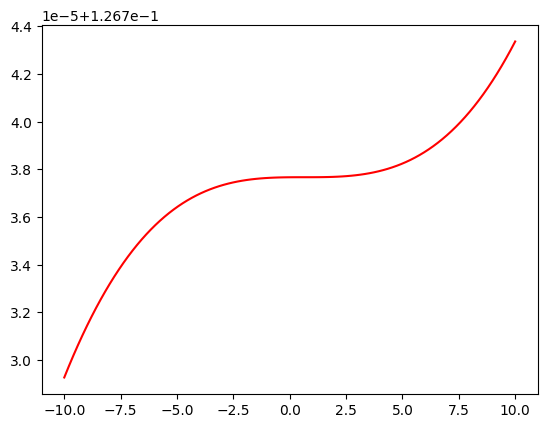

In [35]:
def mt(x):
    x = (x + lr) * wi * mx
    # r = m*x + b
    res = m*(x**3)
    res = (res + ud) * he * my
    return res

xt = np.linspace(-10, 10, 100)
yt = mt(xt)
plt.plot(xt, yt, color="red")
plt.show()

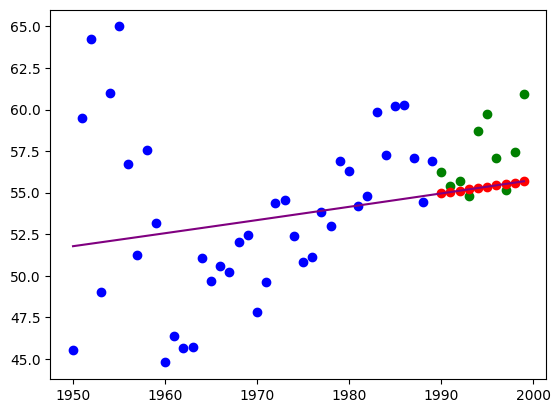

In [38]:
xo = x.copy()
yo = mf(xo)

yrest = mf(xtest)
plt.scatter(xtrain, ytrain, color="blue")
plt.scatter(xtest, ytest, color="green")
plt.scatter(xtest, yrest, color="red")
plt.plot(xo, yo, color='purple')
plt.show()